# # Setup Notebook

#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth
#### 5. Discuss the results and what they mean in a markdown section.
####   o	Does the analysis answer any of your existing research questions?
####   o	Does the analysis lead you to any new research questions?


## import libraries and data

In [33]:
# import libraries 
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display   
import matplotlib.pyplot as plt
import plotly.io as pio

In [34]:
# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [35]:
path = r'C:\Users\IVON6\Chocolate Bar Ratings Analysis'
df_clean_data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_chocolate_merged.csv'))

In [36]:
#drop unnamed column

df_clean_data.drop('Unnamed: 0', axis=1, inplace=True)

In [37]:
#checking table size
df_clean_data.shape

(2693, 10)

In [38]:
df_clean_data.head(10)

,reference_number,company,company_location,review_date,bean_origin,bar_name,cocoa_percent,ingredients,taste,rating
0,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70.00,"2- B,S","chalky, fragrant, then off",2.50
1,999,Bahen & Co.,Australia,2012,Brazil,Bahia,70.00,"2- B,S","chalky, intense, chemical",2.50
2,999,Mast Brothers,U.S.A.,2012,Blend,Madagascar,72.00,"2- B,S","gritty, overly tart, sour",2.50
3,999,Mast Brothers,U.S.A.,2012,Venezuela,Chuao,73.00,"2- B,S","gritty, sour, sweet",2.75
4,995,Bahen & Co.,Australia,2012,Madagascar,Sambirano,70.00,"2- B,S","unrefined, flat, grassy",3.00
5,995,Madre,U.S.A.,2012,USA,"Criollo,Hawaii",70.00,"4- B,S,C,V","creamy, burnt nuts, woody",3.25
6,995,Madre,U.S.A.,2012,USA,Kaua'i Island,70.00,"4- B,S,C,V","vanilla, brownie, peanut",3.50
7,991,Danta,Guatemala,2012,Guatemala,"Oscuro,Finca Chimelb",70.00,"2- B,S","nutty, ashey, spicy pepper",3.25
8,991,Cacao Prieto,U.S.A.,2012,Dominican Republic,"Criollo,Dominican Republic",72.00,"2- B,S","oily, cherry, rich cocoa",3.75
9,991,Videri,U.S.A.,2012,Blend,"Classic,Central,South America",70.00,"3- B,S,C","sweet, fruity, heavy roast",3.25


### Categorical Column

In [40]:
data = {}
categorical = []
for col in df_clean_data.columns:
    data[col] = [len(df_clean_data[col].unique()), df_clean_data[col].dtype]
    if df_clean_data[col].dtype=='object':
        categorical.append(col)
    #print("values:", data_df[col].unique())
init_data = pd.DataFrame.from_dict(data, orient='index', columns=['Unique Data Count', 'Type'])
display(init_data)
print("\nCategory variables:", categorical)

,Unique Data Count,Type
reference_number,671,int64
company,616,object
company_location,68,object
review_date,18,int64
bean_origin,64,object
bar_name,1717,object
cocoa_percent,47,float64
ingredients,23,object
taste,2650,object
rating,12,float64



Category variables: ['company', 'company_location', 'bean_origin', 'bar_name', 'ingredients', 'taste']


In [41]:
df_clean_data.describe()

,reference_number,review_date,cocoa_percent,rating
count,2693.00,2693.00,2693.00,2693.00
mean,1514.08,2014.87,71.60,3.20
std,804.03,4.30,5.51,0.44
min,5.00,2006.00,42.00,1.00
25%,849.00,2012.00,70.00,3.00
50%,1526.00,2015.00,70.00,3.25
75%,2202.00,2018.00,74.00,3.50
max,2876.00,2023.00,100.00,4.00


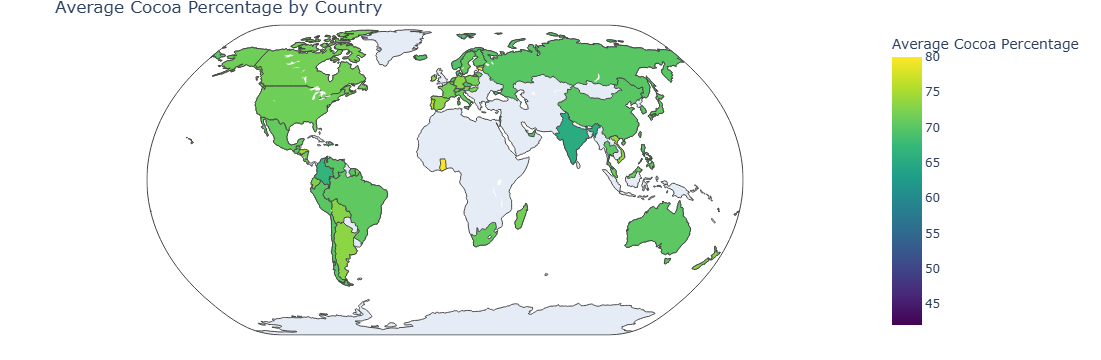

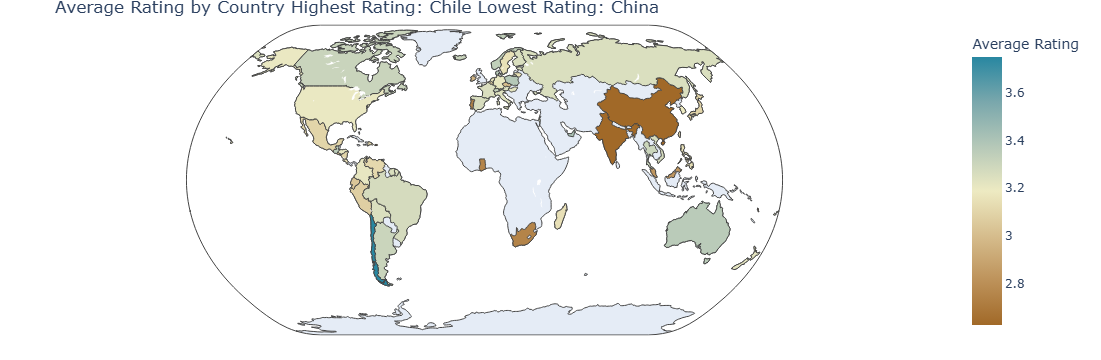

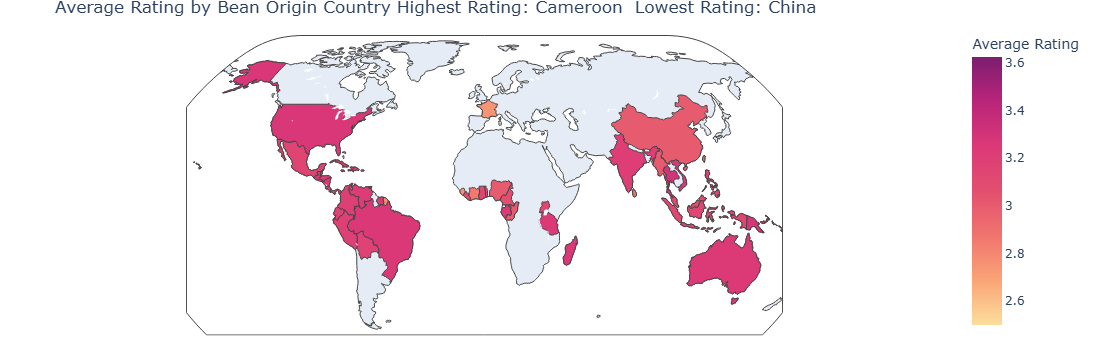

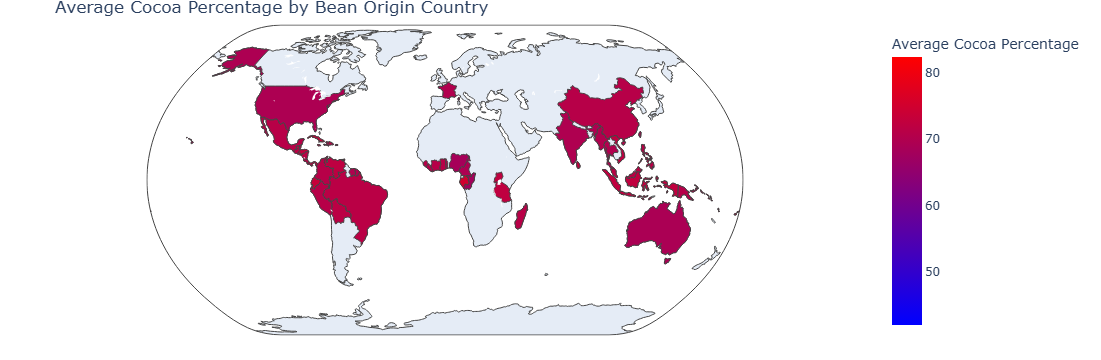

In [ ]:
# Aggregate the average cocoa percentage for each country
avg_cocoa_per_country = df_clean_data.groupby('company_location')['cocoa_percent'].mean().reset_index()
# Aggregate the average rating for each country
avg_rating_per_country = df_clean_data.groupby('company_location')['rating'].mean().reset_index()
# Get the country with the highest and lowest average rating
highest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmax()]
lowest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmin()]

# Create a choropleth map
fig = px.choropleth(avg_cocoa_per_country, 
                    locations='company_location', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='company_location',
                    color_continuous_scale='Viridis',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Average Cocoa Percentage'},
                    title='Average Cocoa Percentage by Country')
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25})


# Create a choropleth map
fig2 = px.choropleth(avg_rating_per_country, 
                    locations='company_location', 
                    locationmode='country names',
                    color='rating',
                    hover_name='company_location',
                    color_continuous_scale='earth',
                    projection='natural earth',
                    labels={'rating': 'Average Rating'},
                    title=f'Average Rating by Country Highest Rating: {highest_rating["company_location"]} Lowest Rating: {lowest_rating["company_location"]}')
fig2.update_layout(margin={"r":25,"t":25,"l":25,"b":25})   

# Aggregate the average cocoa percentage for each country
avg_cocoa_per_origin = df_clean_data.groupby('bean_origin')['cocoa_percent'].mean().reset_index()
# Aggregate the average cocoa percentage for each country
avg_rating_per_origin = df_clean_data.groupby('bean_origin')['rating'].mean().reset_index()
highest_rating_origin = avg_rating_per_origin.loc[avg_rating_per_country['rating'].idxmax()]
lowest_rating_origin = avg_rating_per_origin.loc[avg_rating_per_country['rating'].idxmin()]

# Create a choropleth map
fig3 = px.choropleth(avg_cocoa_per_origin, 
                    locations='bean_origin', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='bean_origin',
                    color_continuous_scale='bluered',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Average Cocoa Percentage'},
                    title='Average Cocoa Percentage by Bean Origin Country')

fig3.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

# Create a choropleth map
fig4 = px.choropleth(avg_rating_per_origin, 
                    locations='bean_origin', 
                    locationmode='country names',
                    color='rating',
                    hover_name='bean_origin',
                    color_continuous_scale='sunsetdark',
                    projection='natural earth',
                    labels={'rating': 'Average Rating'},
                    title=f'Average Rating by Bean Origin Country Highest Rating: {highest_rating_origin["bean_origin"]}  Lowest Rating: {lowest_rating_origin["bean_origin"]}',
                    fitbounds="locations")


fig4.update_layout(margin={"r":25,"t":25,"l":25,"b":25})


# Display the Plotly figures in a grid layout within a Jupyter Notebook
display(fig)
display(fig2)
display(fig4)
display(fig3)

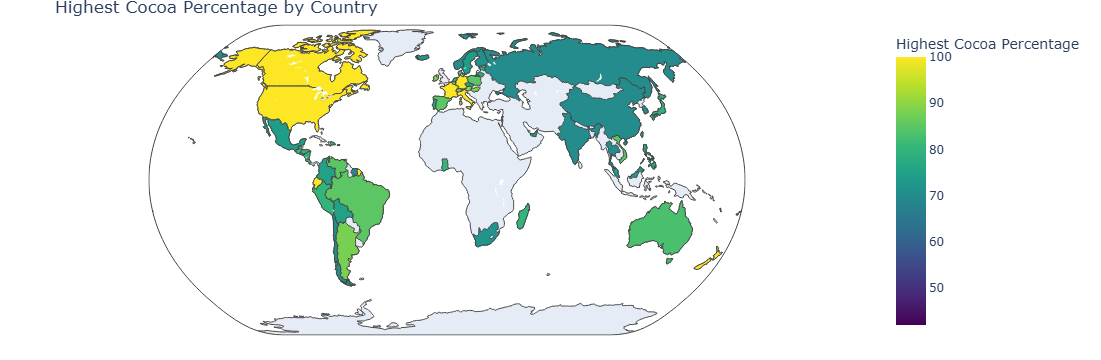

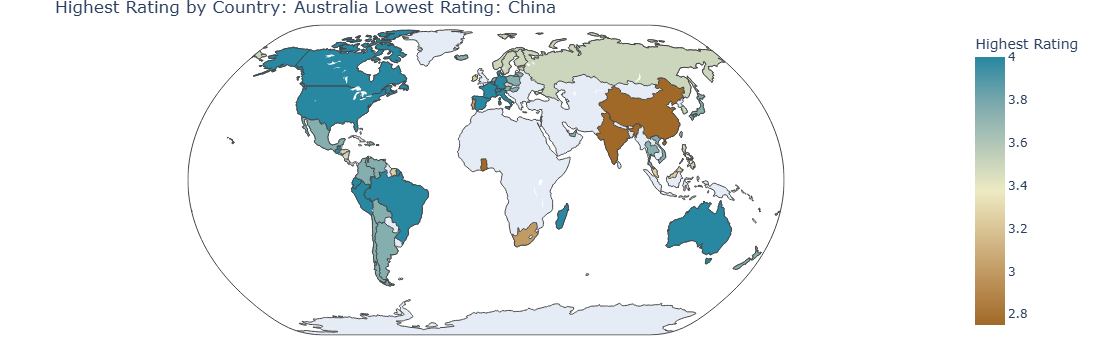

In [43]:
# Aggregate the Highest cocoa percentage for each country
max_cocoa_per_country = df_clean_data.groupby('company_location')['cocoa_percent'].max().reset_index()
# Aggregate the average cocoa percentage for each country
max_rating_per_country = df_clean_data.groupby('company_location')['rating'].max().reset_index()
# Get the country with the highest and lowest average rating
highest_rating = max_rating_per_country.loc[max_rating_per_country['rating'].idxmax()]
lowest_rating = max_rating_per_country.loc[max_rating_per_country['rating'].idxmin()]

# Create a choropleth map
fig = px.choropleth(max_cocoa_per_country, 
                    locations='company_location', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='company_location',
                    color_continuous_scale='Viridis',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Highest Cocoa Percentage'},
                    title='Highest Cocoa Percentage by Country')
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

# Create a choropleth map
fig2 = px.choropleth(max_rating_per_country, 
                    locations='company_location', 
                    locationmode='country names',
                    color='rating',
                    hover_name='company_location',
                    color_continuous_scale='earth',
                    projection='natural earth',
                    labels={'rating': 'Highest Rating'},
                    title=f'Highest Rating by Country: {highest_rating["company_location"]} Lowest Rating: {lowest_rating["company_location"]}')
fig2.update_layout(margin={"r":25,"t":25,"l":25,"b":25}) 


# Display the Plotly figures in a grid layout within a Jupyter Notebook
display(fig)
display(fig2)

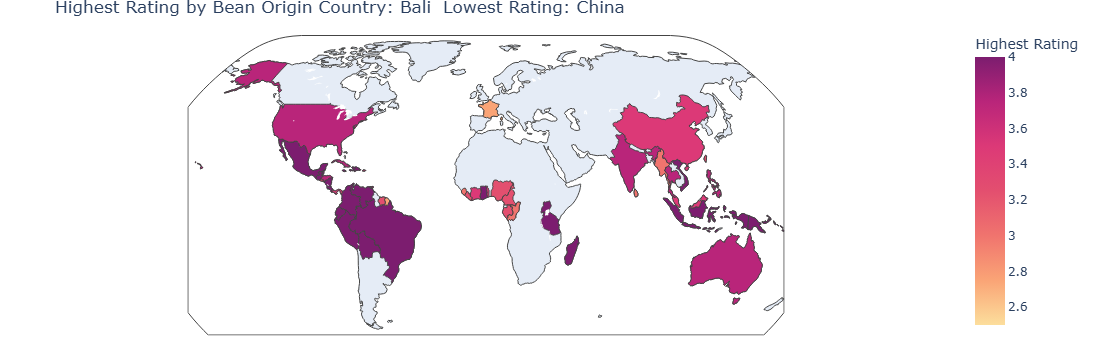

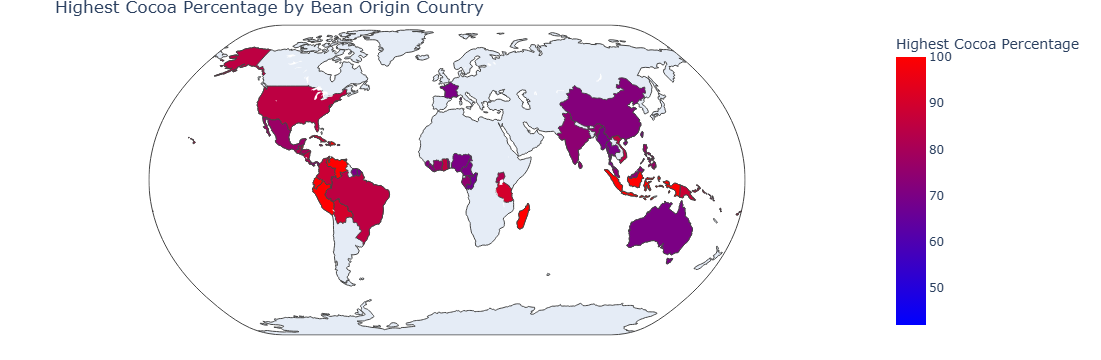

In [44]:
# Aggregate the average cocoa percentage for each country
max_cocoa_per_origin = df_clean_data.groupby('bean_origin')['cocoa_percent'].max().reset_index()
# Aggregate the average cocoa percentage for each country
max_rating_per_origin = df_clean_data.groupby('bean_origin')['rating'].max().reset_index()
highest_rating_origin = max_rating_per_origin.loc[max_rating_per_country['rating'].idxmax()]
lowest_rating_origin = max_rating_per_origin.loc[max_rating_per_country['rating'].idxmin()]

# Create a choropleth map
fig3 = px.choropleth(max_cocoa_per_origin, 
                    locations='bean_origin', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='bean_origin',
                    color_continuous_scale='bluered',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Highest Cocoa Percentage'},
                    title='Highest Cocoa Percentage by Bean Origin Country')

fig3.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

# Create a choropleth map
fig4 = px.choropleth(max_rating_per_origin, 
                    locations='bean_origin', 
                    locationmode='country names',
                    color='rating',
                    hover_name='bean_origin',
                    color_continuous_scale='sunsetdark',
                    projection='natural earth',
                    labels={'rating': 'Highest Rating'},
                    title=f'Highest Rating by Bean Origin Country: {highest_rating_origin["bean_origin"]}  Lowest Rating: {lowest_rating_origin["bean_origin"]}',
                    fitbounds="locations")


fig4.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

# Display the Plotly figures in a grid layout within a Jupyter Notebook
display(fig4)
display(fig3)

### Does the analysis answer any of your existing research questions?

In [46]:
# What is the average rating by country of origin? Highest rating: Bali 
# and the Lowest rating goes to China

In [47]:
# Where are the best cocoa beans grown?
# Venezuela, Peru, Ecuador, Madagascar, Indonesia

In [48]:
# Which countries produce the highest-rated bars? 
# Venezuela with 5.0

In [49]:
# Average rating by Country: Highest Chile and lowest China